# **Air Quality Forecast: Machine Learning Model**

Air quality has a significant impact on human health and the environment. The main factors affecting air quality in India are:

- PM2.5 and PM10: Particulate matter
- NO, NO2, NOx: Nitrogen oxides
- NH3: Ammonia
- CO: Carbon monoxide
- SO2: Sulfur dioxide
- O3: Ozone
- Benzene, Toluene, Xylene: Volatile organic compounds

The primary goal of our air quality prediction model is to accurately forecast the Air Quality Index (AQI). AQI is an indicator that shows the level of air pollution and its effects on public health.

![AQI Mini Image](https://www.deq.ok.gov/wp-content/uploads/air-division/aqi_mini-768x432.png)



Our model predicts future AQI values based on the levels of various pollutants that affect air quality. These predictions assist decision-makers in issuing health alerts, formulating environmental policies, optimizing traffic and industrial management, and helping the general public plan their daily activities.

**What is the business problem you are trying to solve using machine learning?**
* The problem you are trying to solve in this project is to predict future Air Quality Index (AQI) values by analyzing the factors affecting AQI using machine learning algorithms. These predictions can be used to monitor air quality and develop improvement strategies. The goal is to identify the impact of various pollutant parameters (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene) on AQI and to forecast AQI based on the future values of these parameters.

**Why are we interested in solving this problem? What impact will it have on the business?**

- Solving this problem is of great importance for public health, environmental sustainability, and the protection of biodiversity. Accurately predicting air quality allows authorities and the public to take measures against air pollution. For example, health alerts and precautions can be issued. Regulations and policies related to air pollution can be developed. Industrial and traffic management can be optimized. By providing a cleaner environment to society, the quality of life can be improved.

**What are some known issues with the data? (data entry errors, missing data, unit differences, etc.)**
- Missing Data: Several columns, including the target column, have missing values.
- Unit Differences: The Date column initially had a data type of object and has been converted to Datetime. 
- Seasonal Variations: Seasonal effects can introduce variability in the data.

### Loading the required Library Packages

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

### Reading and exploring the Health Care Dataset

In [2]:
df = pd.read_csv('air quality data.csv')

**ANALYZING THE DATASET**
- Size, data types, null value rate, statistical information for each column

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
# Checking the number of rows and columns of the dataset
df.shape

(29531, 16)

In [5]:
# Dataset Information Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
# There no Duplicate values present in the dataset
df.duplicated().sum()

0

In [8]:
# Drop rows where the 'AQI' column has missing values
df1= df.dropna(subset=['AQI'],inplace=True)


In [9]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [10]:
df.shape

(24850, 16)

In [11]:
# Summary Statistics for the Dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [12]:
#in this DataFrame and the percentage of these null values 
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [13]:
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

### Key Considerations:
Xylene has the highest percentage of missing values (61.86%), so you'll need to decide whether to impute these values or drop the feature.

PM10 and NH3 also have significant missing values (around 28-26%).

No Missing Values:
City, Date, AQI, and AQI_Bucket have 0% null values

### Now we will start our Data Exploration using Visualization EDA - Univariate analysis for each feature

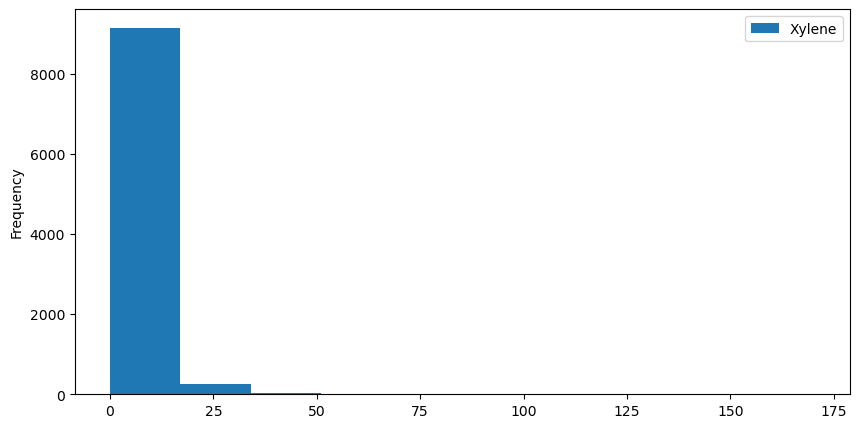

In [16]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

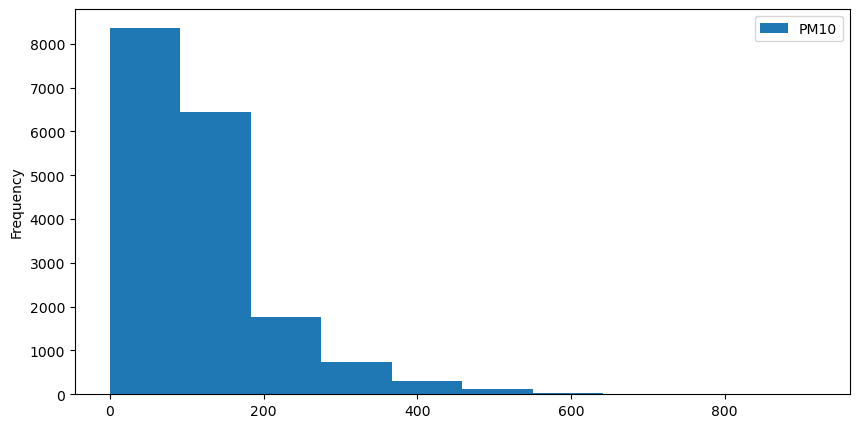

In [17]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

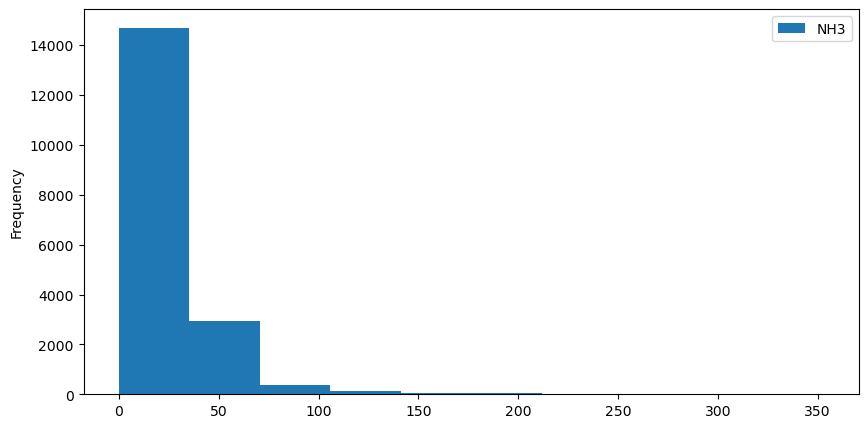

In [18]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

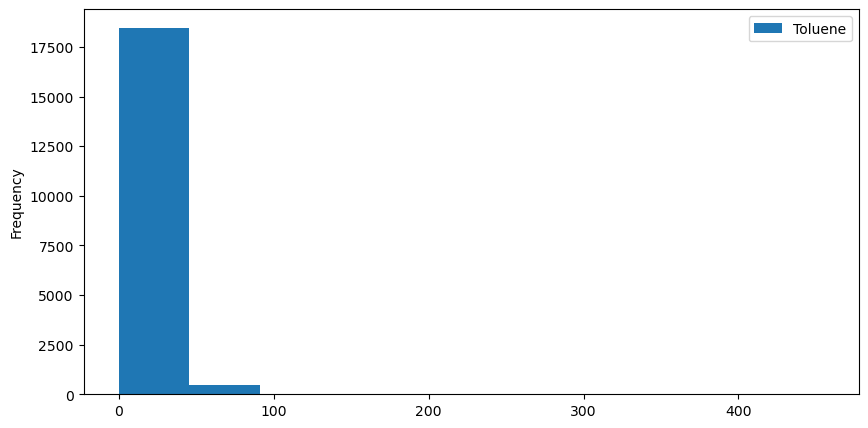

In [19]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

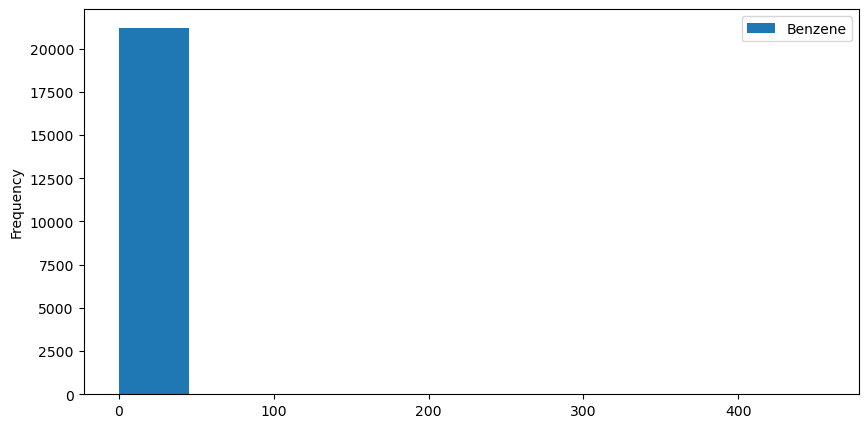

In [20]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

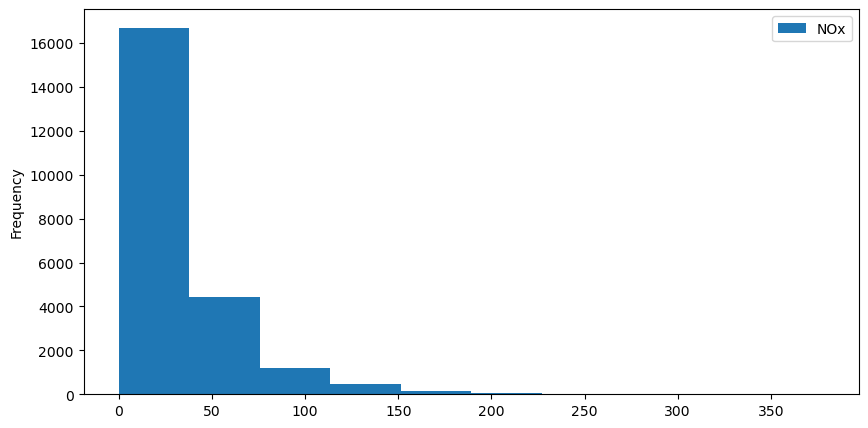

In [21]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

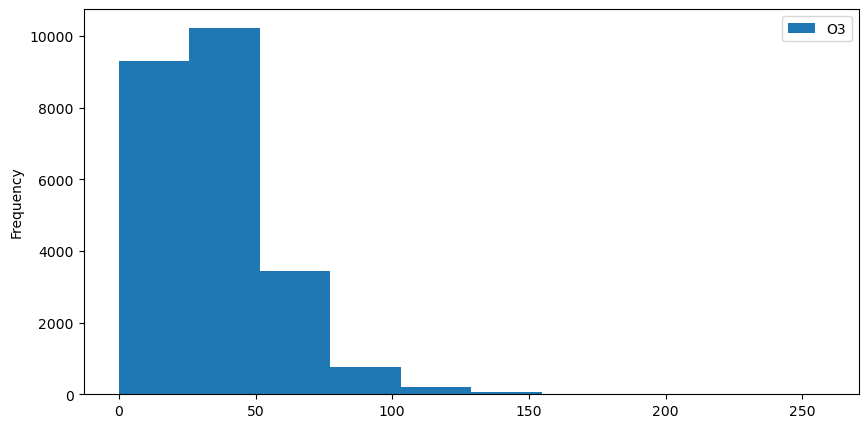

In [22]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

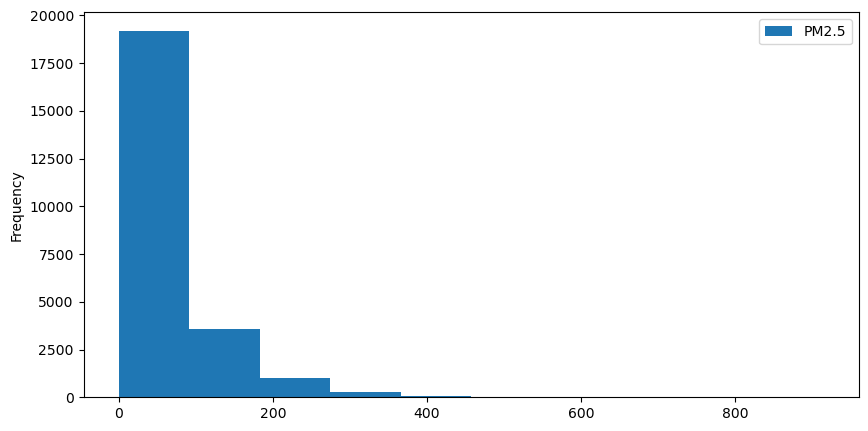

In [23]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

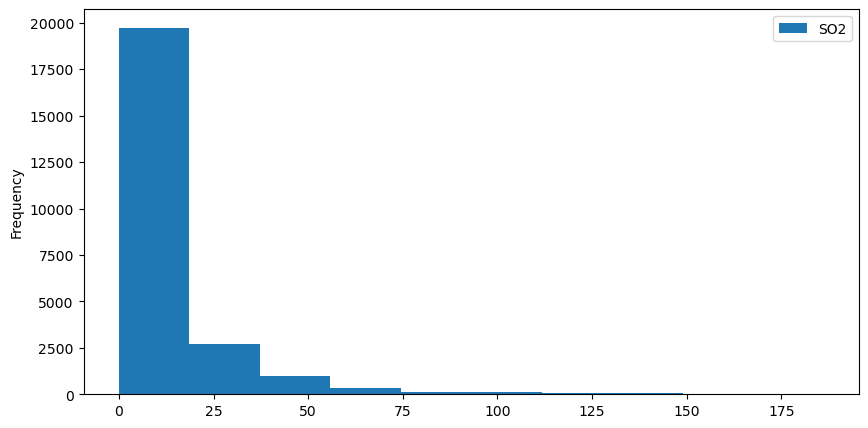

In [24]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

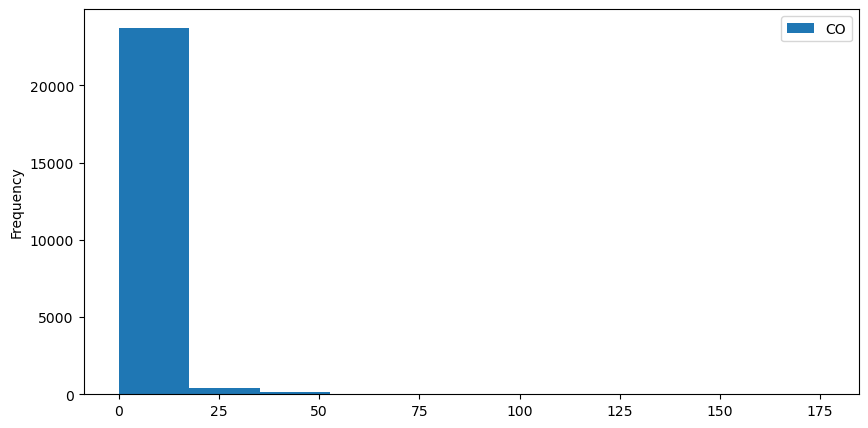

In [25]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

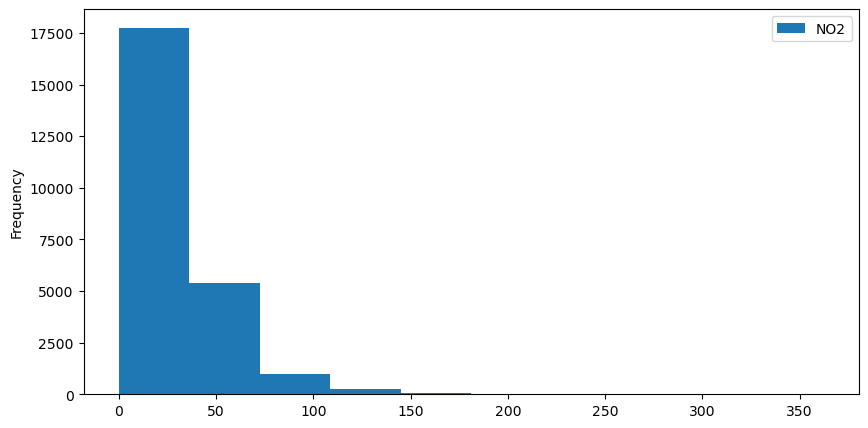

In [26]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

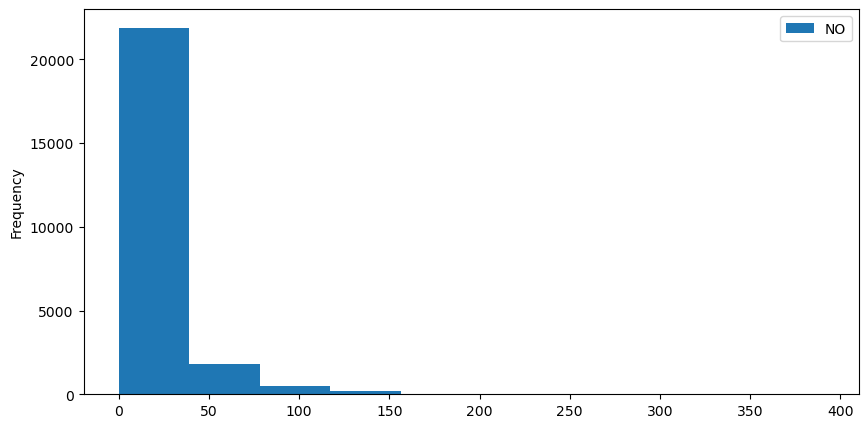

In [27]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

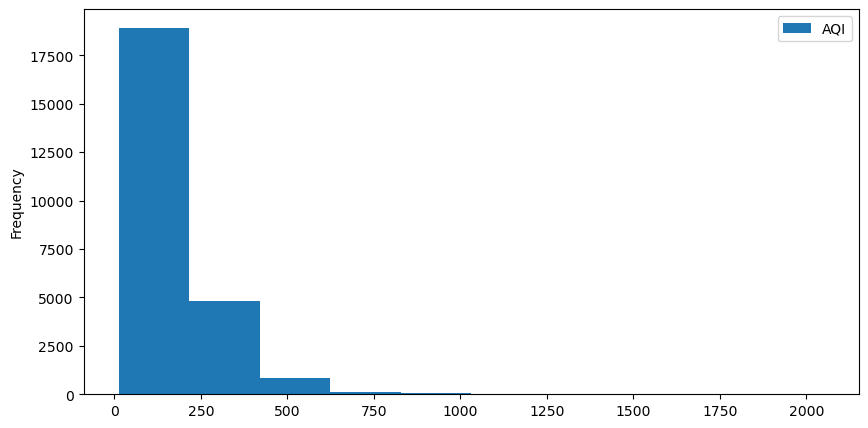

In [28]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

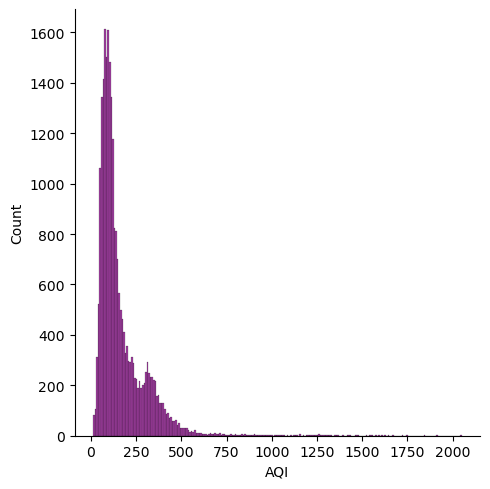

In [29]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="purple")
plt.show()

In the below plot, we can see the frequency of the different city types present in the whole dataset.

### Bivariate analysis

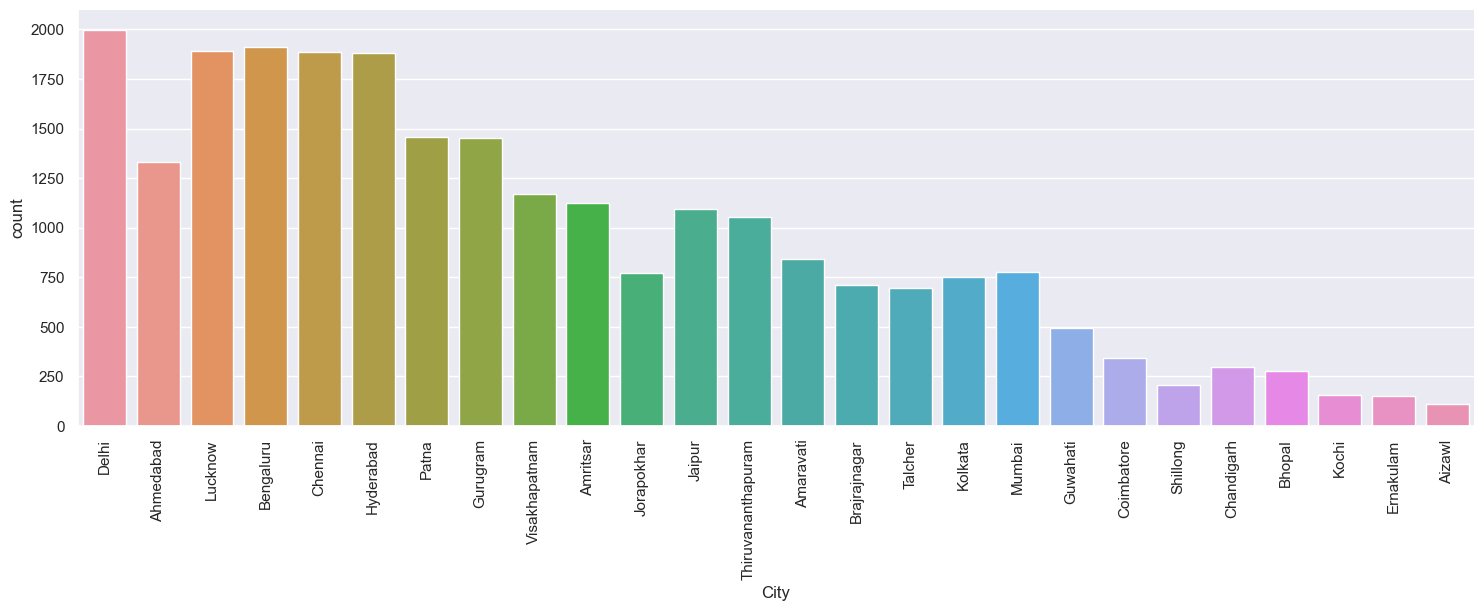

In [30]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In the below plot, we can see the frequency of all the city types for different "AQI_Bucket" variable, which are categorized as "Poor", "Very Poor", "Severe", "Moderate", "Satisfactory", "Good". It is basically so that we can get an idea of how frequency of different cities are distributed over "AQI_Bucket" variable. This will basically clear our idea about the data a bit more

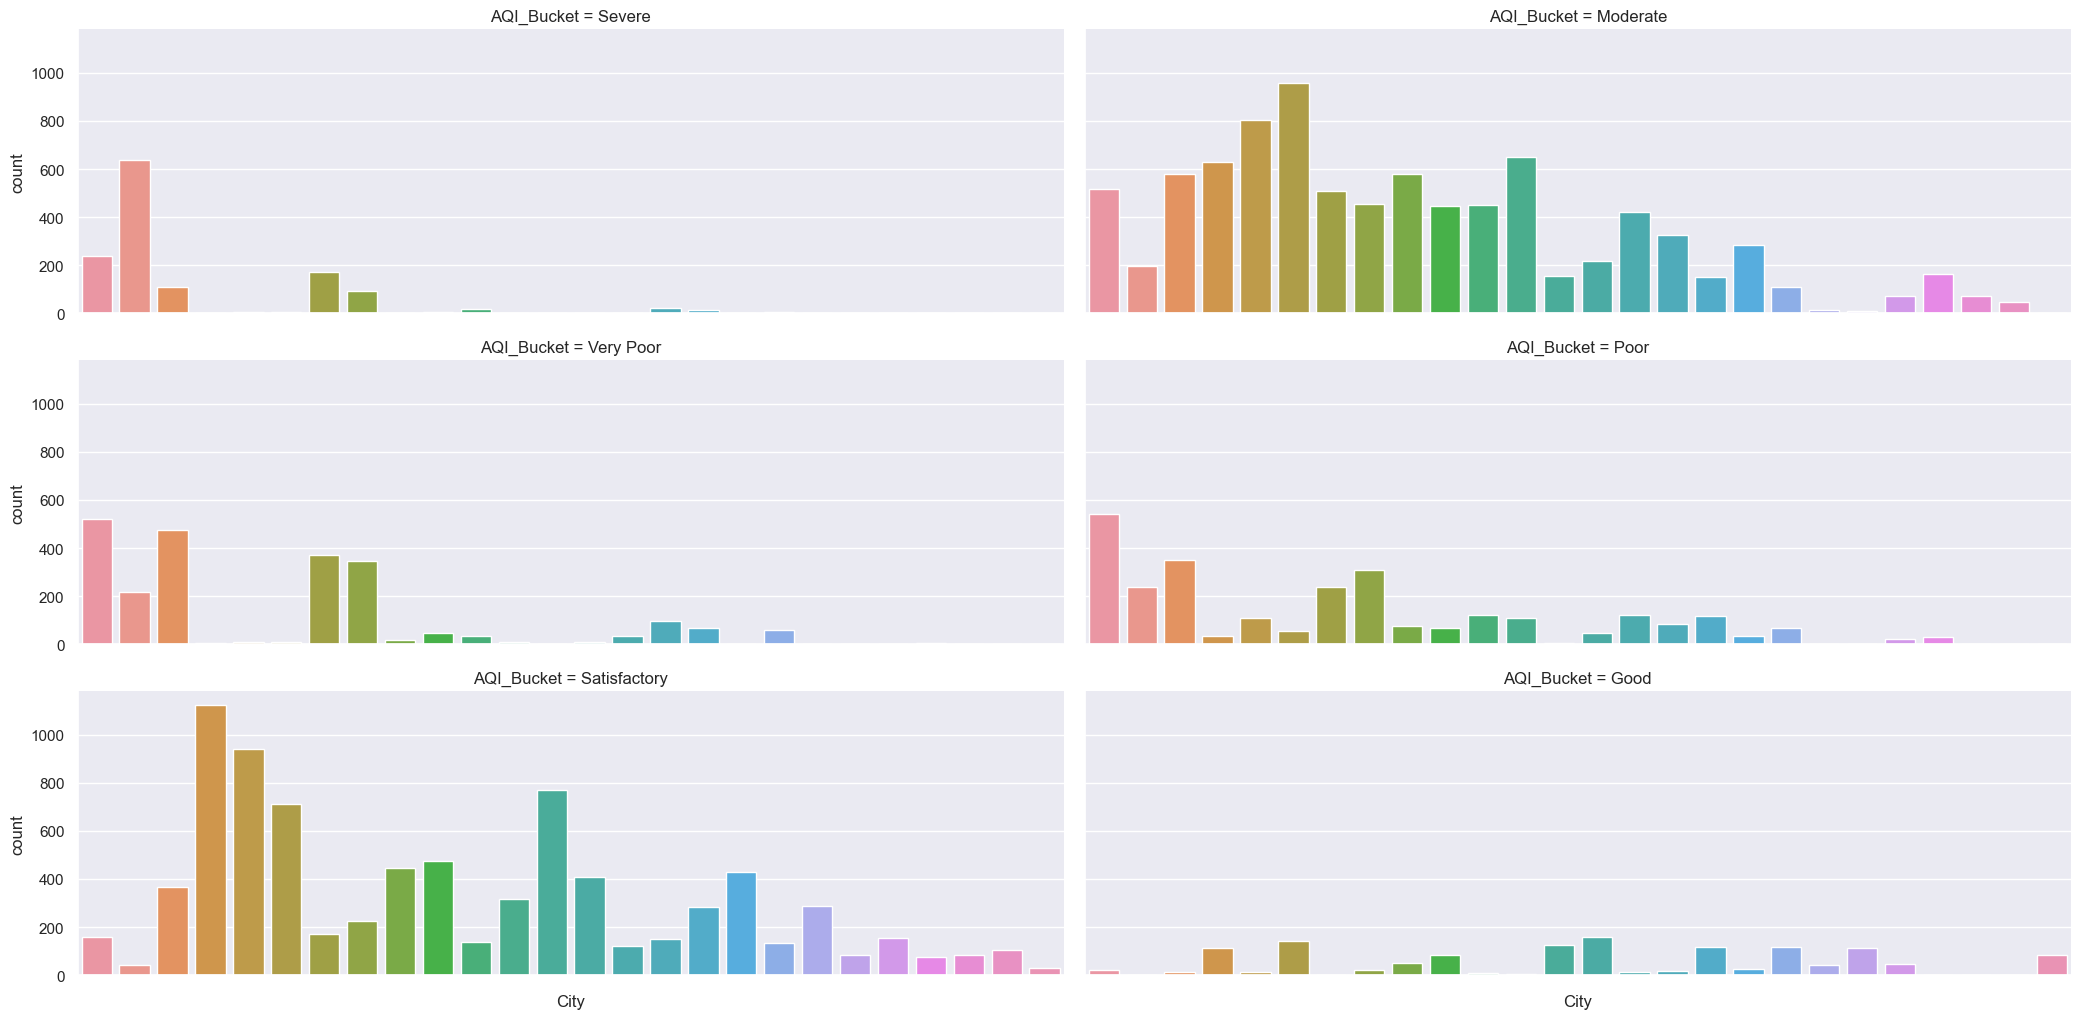

In [31]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

Below plots will be a sequence of boxplots, and the intention is to show the distribution of all the non-nulls numerical variables over the cities.

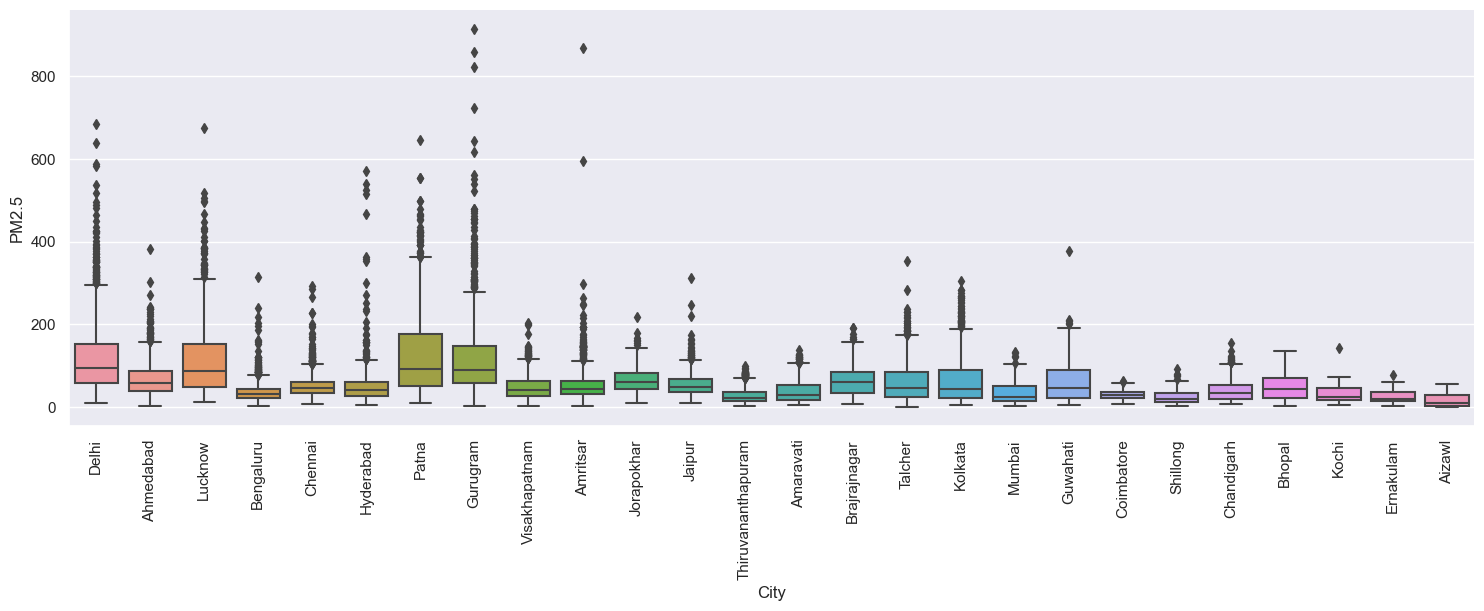

In [32]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

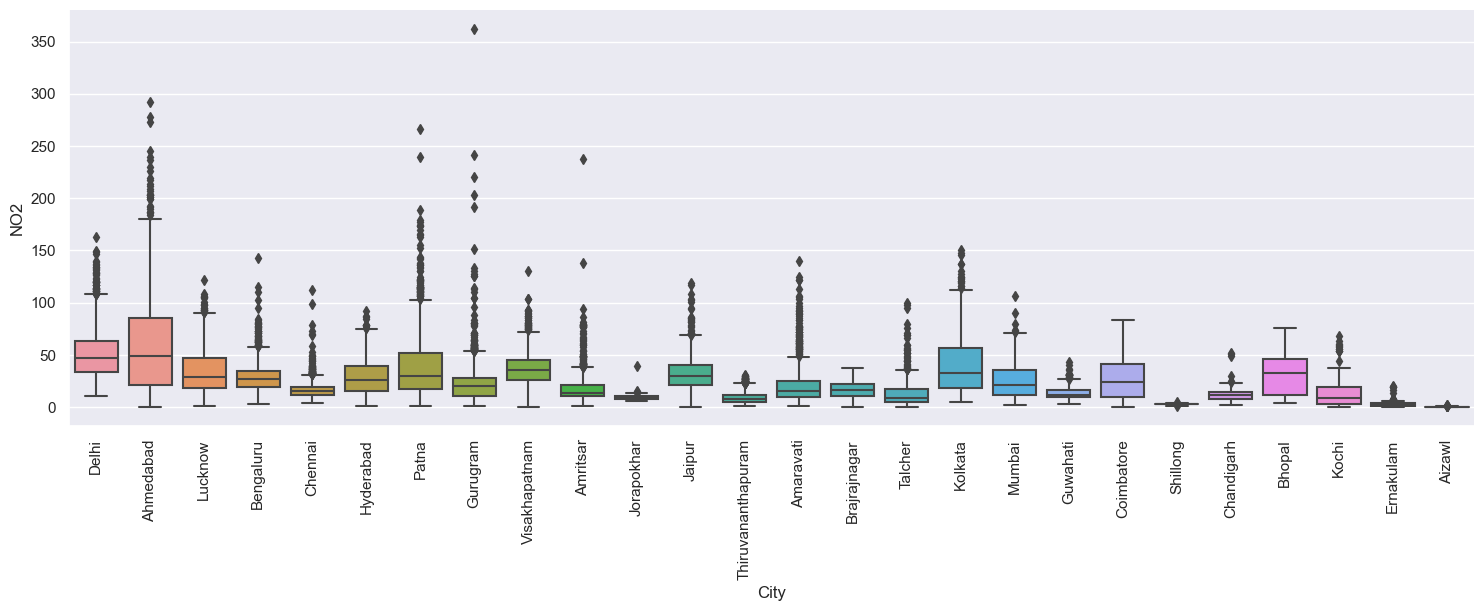

In [33]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

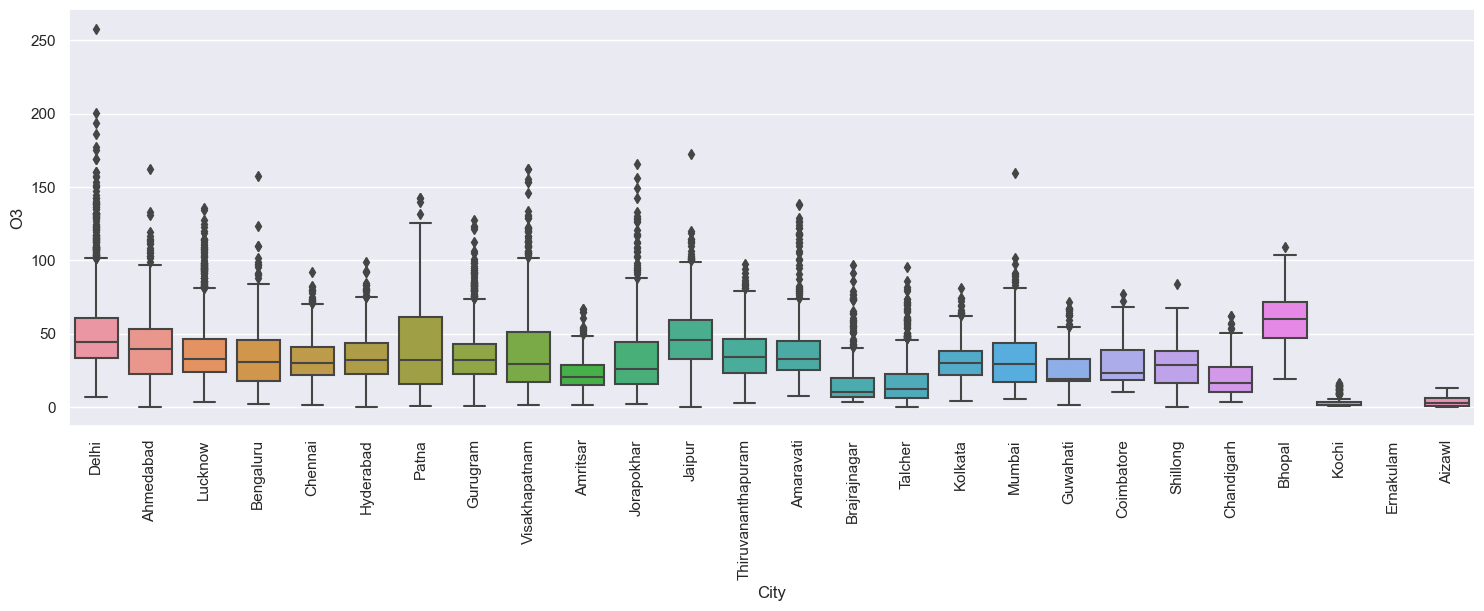

In [34]:
graph3=sns.catplot(x="City",y="O3",data=df,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

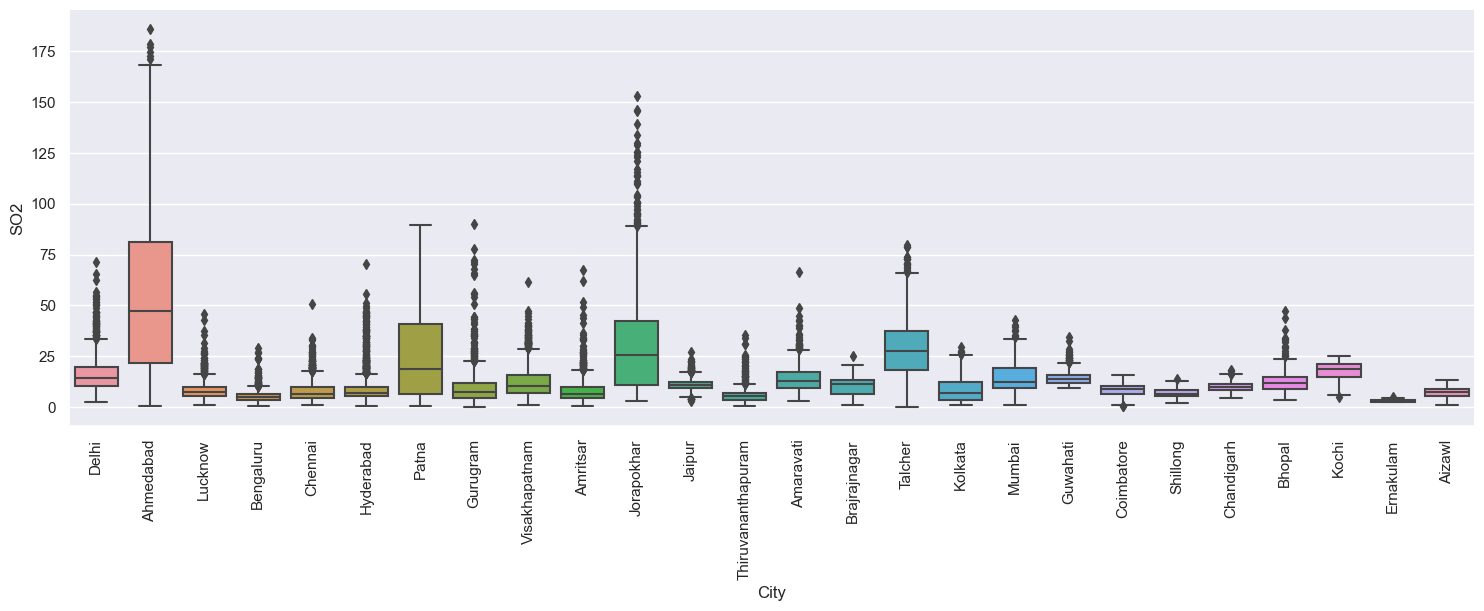

In [35]:
graph4=sns.catplot(x="City",y="SO2",data=df,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

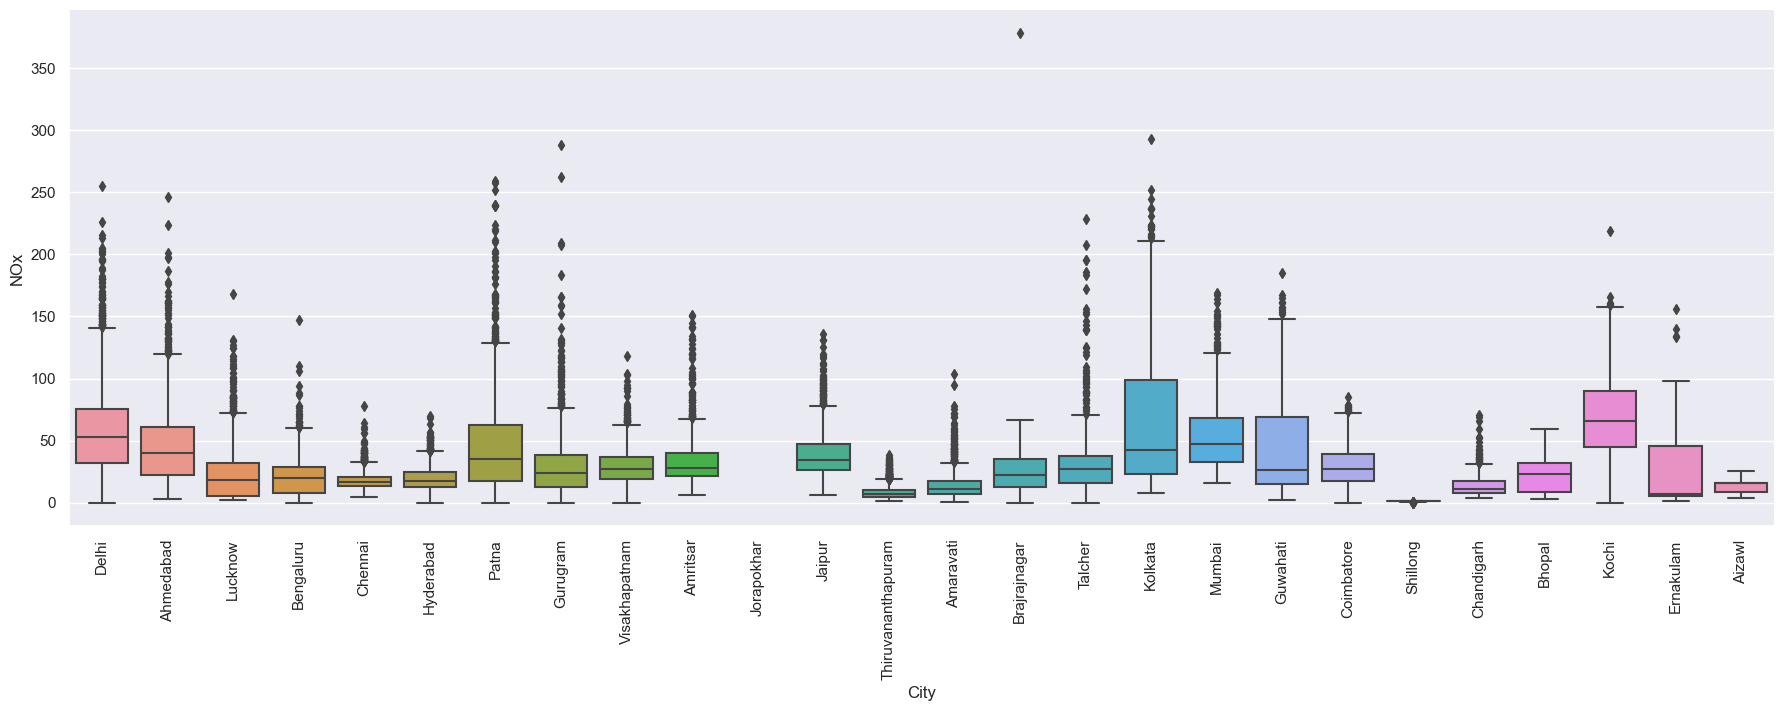

In [36]:
graph5=sns.catplot(data=df,kind="box",x="City",y="NOx",height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

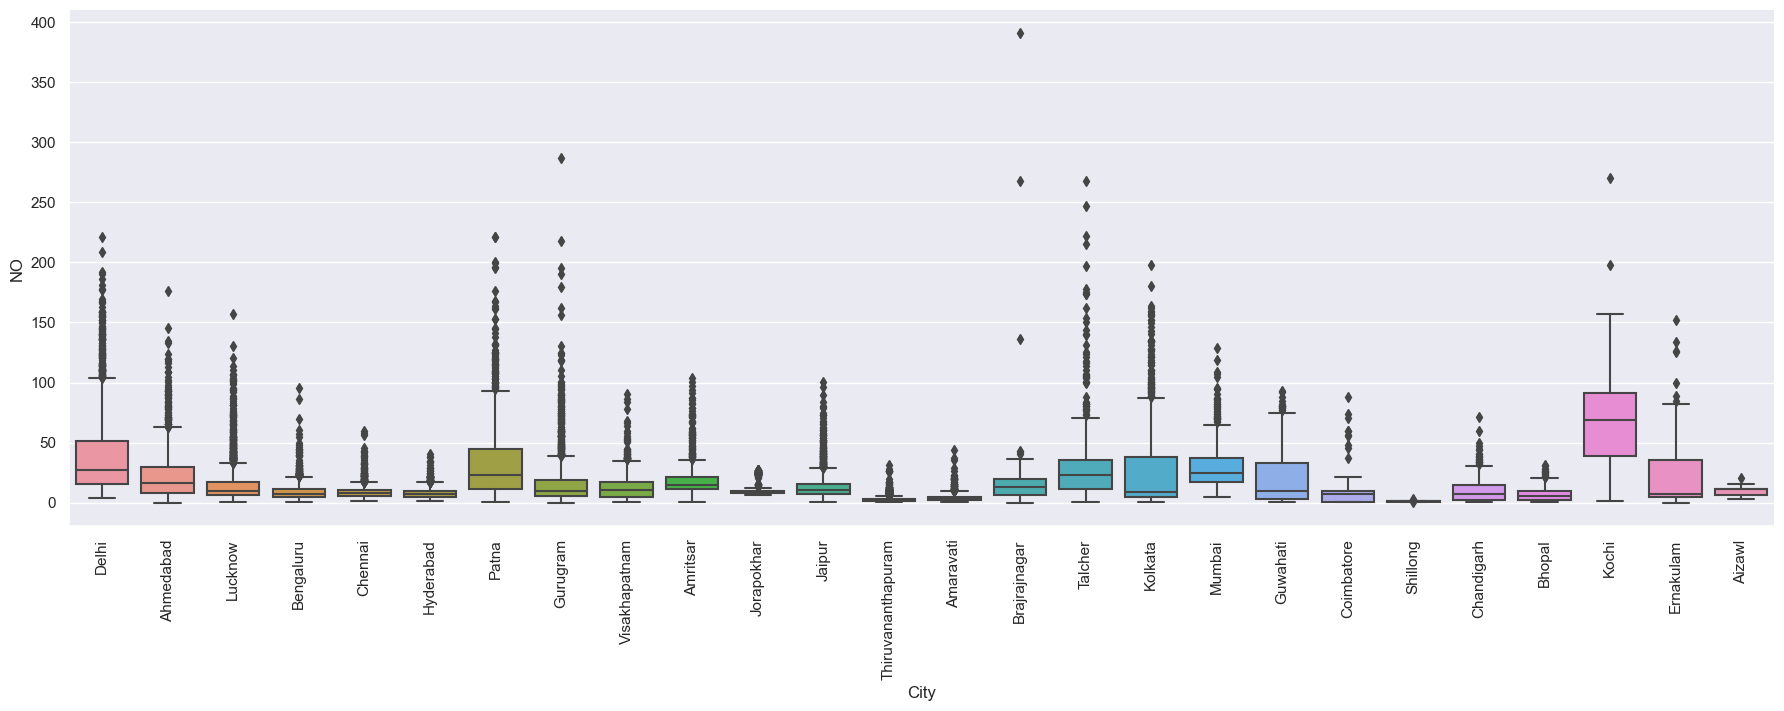

In [37]:
graph6=sns.catplot(data=df,kind="box",x="City",y="NO",height=6,aspect=3)
graph6.set_xticklabels(rotation=90)

In the below plot, we are trying to see the frequencies of the different categories of the variable AQI_Bucket.

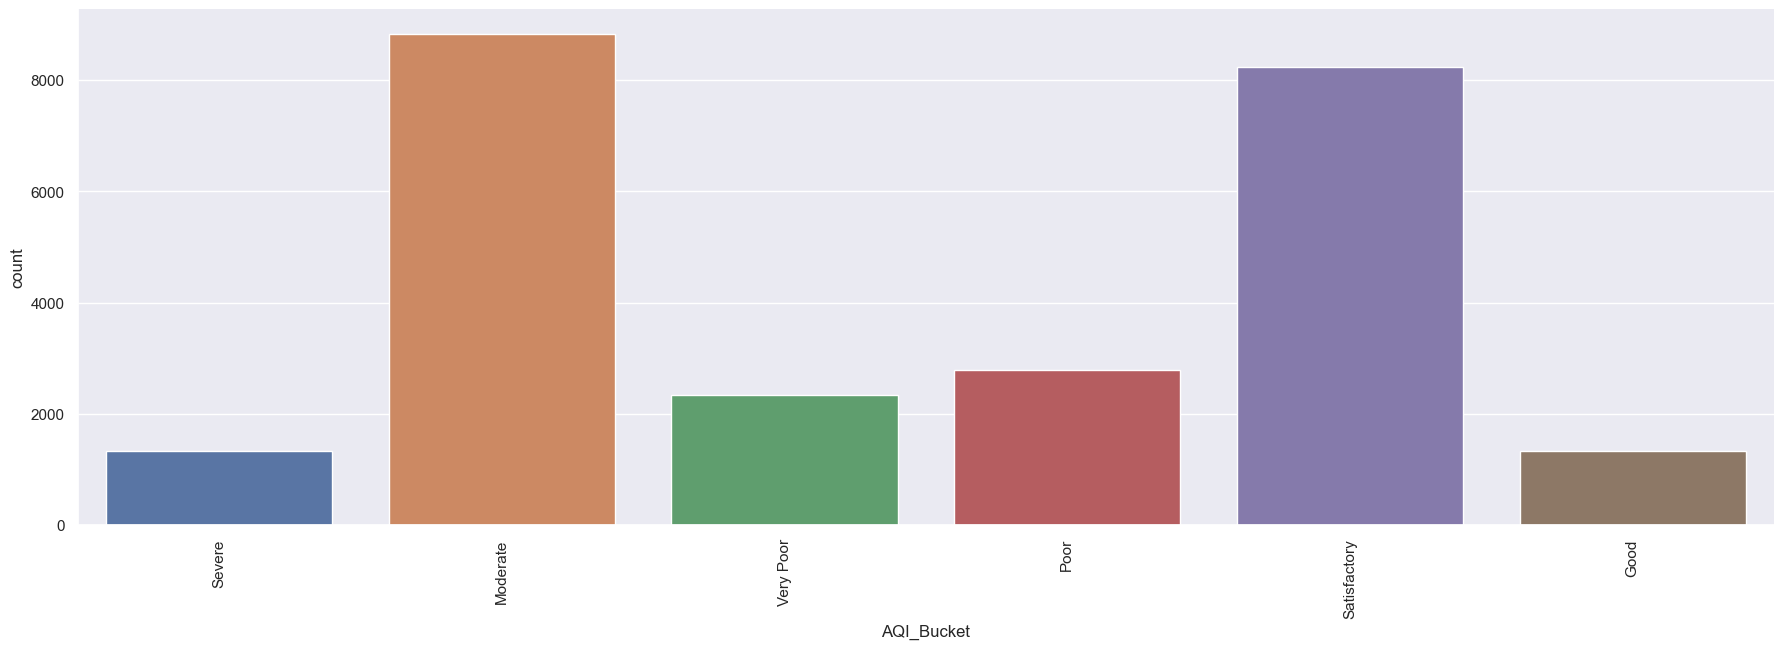

In [38]:
graph7=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

#### Checking all null values and treating those null values.

In [39]:
# Checking all null values

df.isnull().sum().sort_values(ascending=False)

# higher null values present in PM10 followed by NH3

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [40]:
df.describe().loc["mean"]

Date       2018-07-24 18:51:25.714285824
PM2.5                          67.476613
PM10                          118.454435
NO                             17.622421
NO2                            28.978391
NOx                            32.289012
NH3                            23.848366
CO                              2.345267
SO2                            14.362933
O3                             34.912885
Benzene                         3.458668
Toluene                         9.525714
Xylene                          3.588683
AQI                           166.463581
Name: mean, dtype: object

In [41]:
df = df.replace({

"PM2.5" : {np.nan:67.476613},
"PM10" :{np.nan:118.454435},
"NO": {np.nan:17.622421},
"NO2": {np.nan:28.978391},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"CO":  {np.nan:2.345267},
"SO2": {np.nan:34.912885},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})


In [42]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

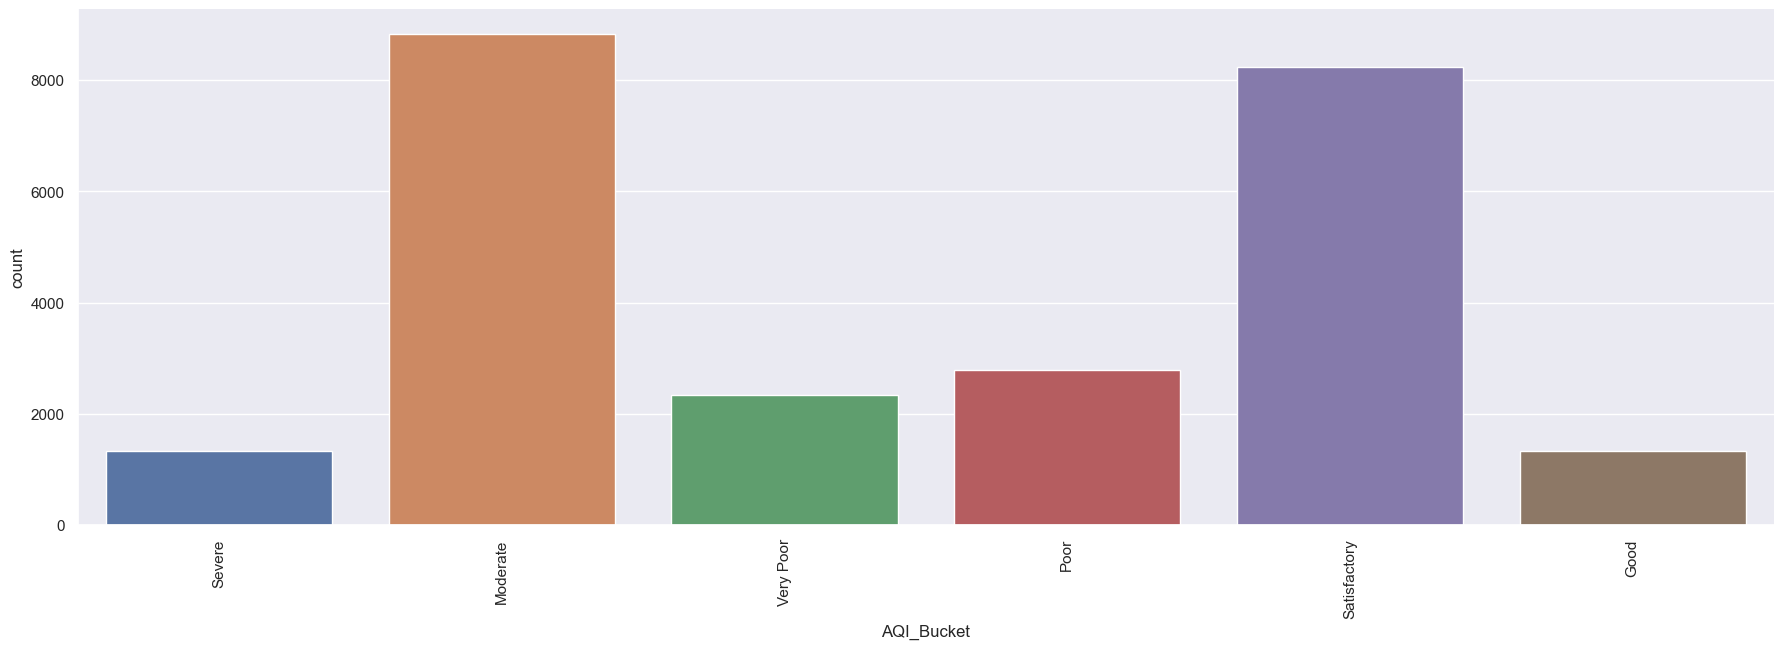

In [43]:
graph=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph.set_xticklabels(rotation=90)

We delete AQI_Bucket from the dataset because it is not a feature that affects air quality

In [44]:
df = df.drop(["AQI_Bucket"], axis=1)

In [45]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0


### Detecting Outliers and Treatment

We drew boxplots to observe outlier data.

<Axes: >

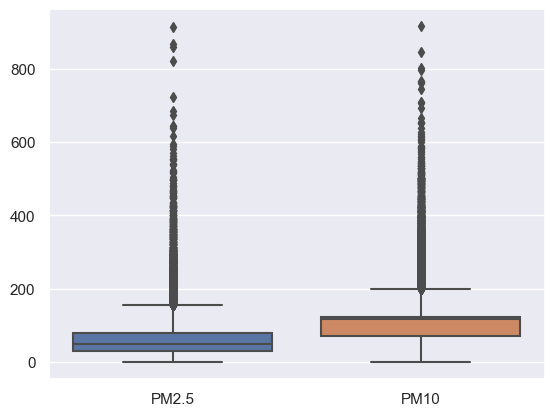

In [46]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

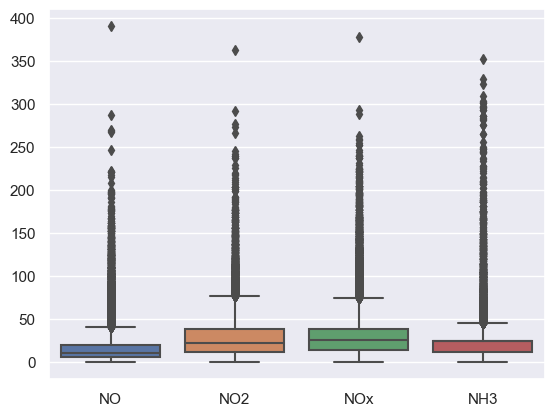

In [47]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']]) 

<Axes: >

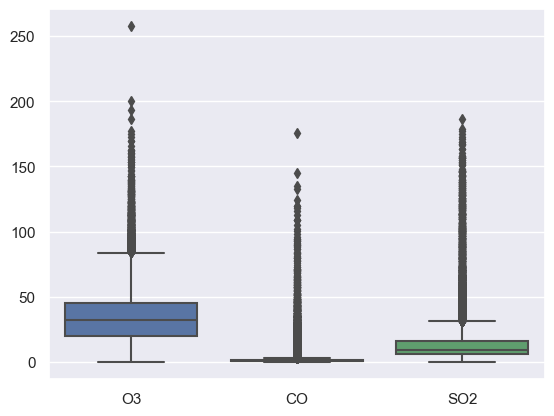

In [48]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

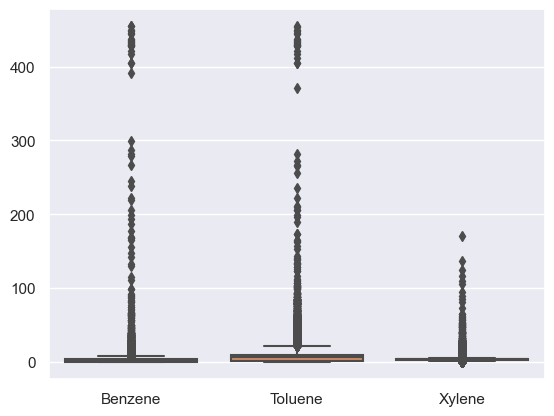

In [49]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

**DATA EDITING PROCEDURES**
- Procedures related to outlier data, missing data, data that has little relationship with our target column

We observed that there were too many outliers in our independent variables. We thought that the modeling we would do with this data would give us incorrect results, so we changed the outliers.

In [50]:
# This function takes a DataFrame as a parameter and identifies outliers for numeric columns in the DataFrame. 
#It replaces these outliers with the corresponding quartile values ​​(Q1 or Q3). Outliers are identified using the interquartile range (IQR).
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound, 
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

In [51]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,24850,2018-07-24 18:51:25.714285824,2015-01-01 00:00:00,2017-08-16 00:00:00,2018-11-05 00:00:00,2019-10-11 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24850.0,55.174281,0.04,29.56,50.165,79.505625,154.3,31.829575
PM10,24850.0,101.351323,0.03,71.78,118.454435,122.955625,199.7,39.079916
NO,24850.0,12.507694,0.03,5.72,10.075,19.71,40.68,8.762015
NO2,24850.0,25.901114,0.01,12.09,22.535,37.91,76.62,16.669494
NOx,24850.0,26.574513,0.0,14.03,25.72,38.17,74.38,16.138682
NH3,24850.0,19.486584,0.01,11.28,23.848366,24.71,44.85,9.63037
CO,24850.0,1.040507,0.0,0.59,0.95,1.53,2.94,0.615436
SO2,24850.0,10.616411,0.01,5.79,9.43,15.94,31.16,6.09153
O3,24850.0,33.288444,0.01,19.64,32.06,45.395625,83.99,17.509123


We created another box plot for the data in the columns of the current DataFrame.

<Axes: >

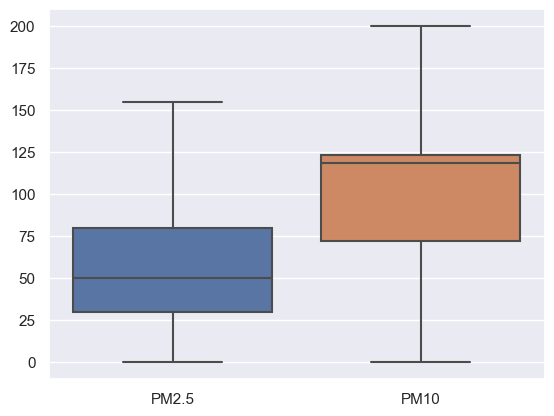

In [52]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

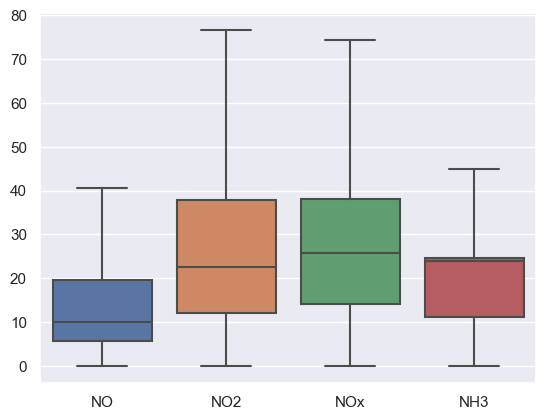

In [53]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

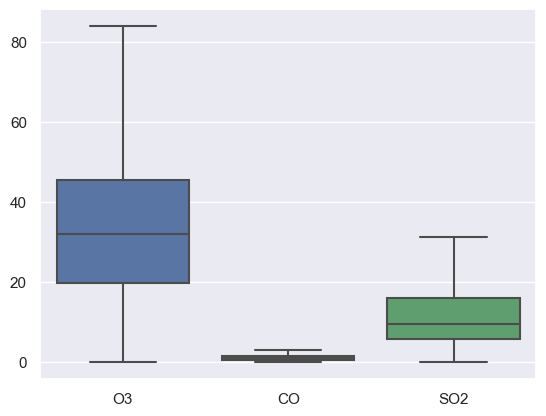

In [54]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

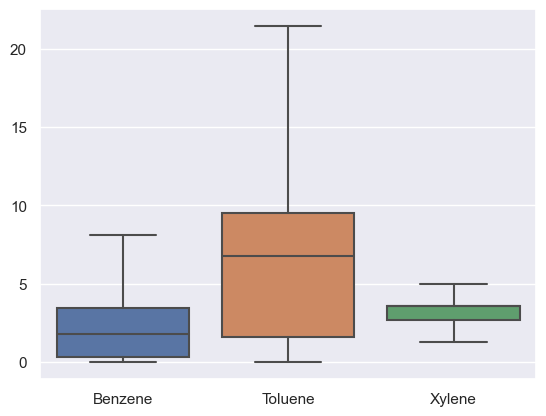

In [55]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

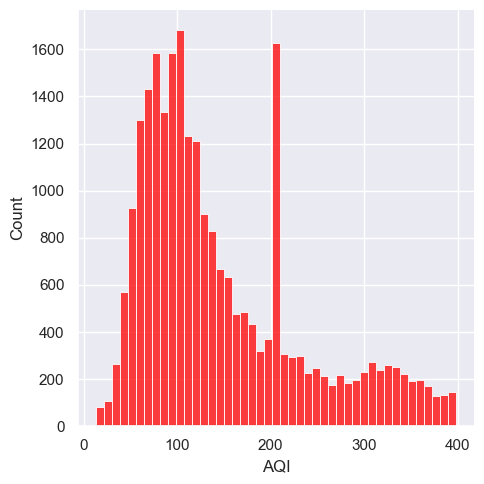

In [56]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="red")
plt.show()

In [58]:
df1=df.drop(columns=['City'])

#### Multivariate analysis

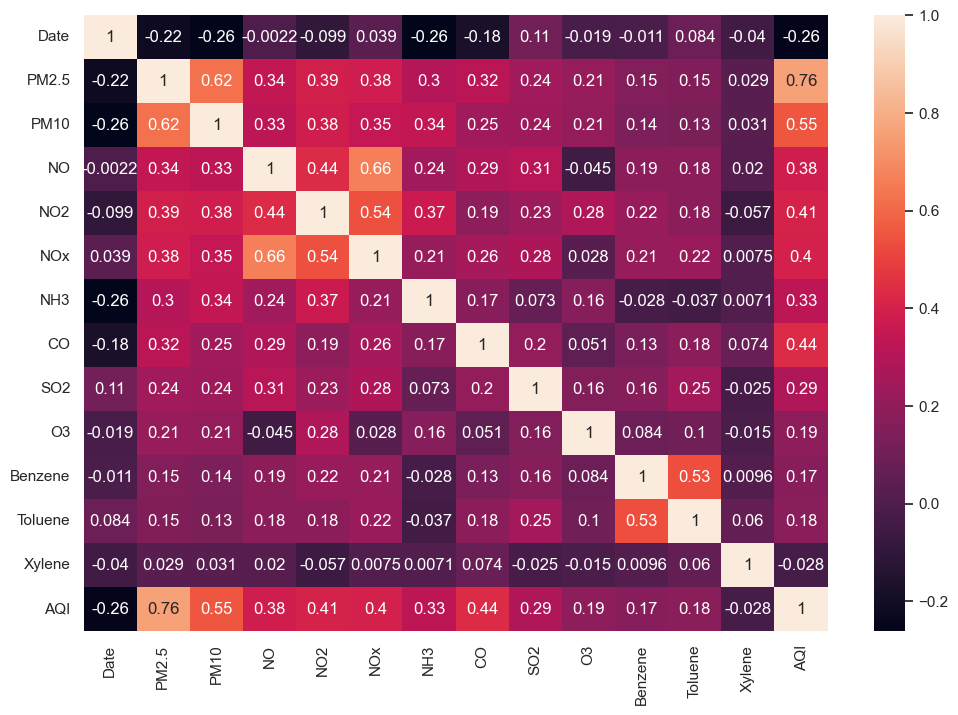

In [59]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df1.corr(),annot=True) 
plt.show() 

The most important variables affecting the AQI value appear to be PM2.5, PM10, CO and NOx.We will make predictions based on data above 0.25